### Load Modules

In [126]:
# import ML models
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import os
from scipy.stats import skew
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost
import warnings

### Load Data

In [2]:


os.chdir(r"C:\Users\jtlqh\bootcamp\my_projects\kaggle")

train = pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")

### EDA

In [3]:
print(train.shape)
print(test.shape)


(1460, 81)
(1459, 80)


In [4]:
print(train.columns)
train.info()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df=pd.concat([train.iloc[:,:-1],test])
df.shape

(2919, 80)

In [6]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)

df.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
numeric_feat=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',\
'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',\
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',\
'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',\
'PoolArea','MiscVal','MoSold','YrSold']

categorical_feat=['MSZoning','Street','Alley','LotShape','LandContour','Utilities',\
'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',\
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',\
'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',\
'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',\
'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',\
'SaleType','SaleCondition']

In [8]:
df[numeric_feat].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
df[categorical_feat].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


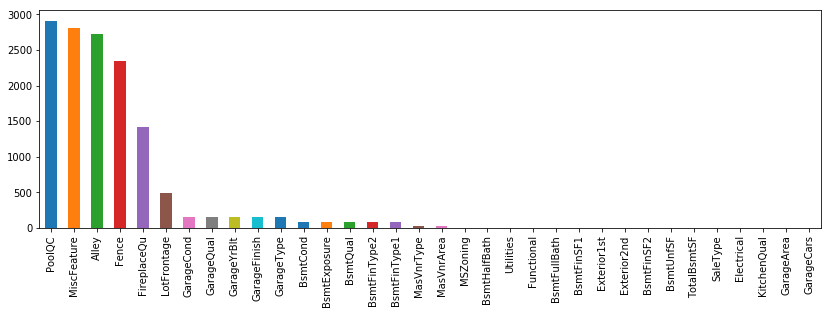

In [10]:
plt.rcParams['figure.figsize']= [14.0, 4.0]
missing=df.isna().sum().sort_values(ascending=False)
missing[missing>0].plot(kind='bar')

### Data Processing

#### missing garage data are not at random
Peeking at the missing entries for garage related data, they are not at random, it is reasonable to them filled with "None" for categorical or 0 for numerical.

In [11]:
garage_list = [i for i in df.columns if str(i).startswith("Garage")]
print(df[garage_list].info())
df[df['GarageCond'].isna()][garage_list].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 7 columns):
GarageType      2762 non-null object
GarageYrBlt     2760 non-null float64
GarageFinish    2760 non-null object
GarageCars      2918 non-null float64
GarageArea      2918 non-null float64
GarageQual      2760 non-null object
GarageCond      2760 non-null object
dtypes: float64(3), object(4)
memory usage: 182.4+ KB
None


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [12]:
for i in garage_list:    
    if df[i].dtypes !='float64': df[i].fillna("None", inplace=True)
    else: df[i].fillna(0, inplace=True)


In [13]:
# fill LotFrontage missings with median value in the same neighborhood

df['LotFrontage'] = df[['Neighborhood','LotFrontage']].groupby('Neighborhood').transform(lambda x: x.fillna(x.median()))


for i in ['MiscFeature','Fence','PoolQC','Alley','FireplaceQu']:
    df[i].fillna("None", inplace=True)   

# impute MSZoning missings as the most frequent value in the same MSSubClass
df['MSZoning'] = df[['MSSubClass', 'MSZoning']].groupby('MSSubClass').transform(lambda x: x.fillna(x.mode()[0]))

df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)

df['Exterior1st'].fillna('Wd Sdng',inplace=True)
df['Exterior2nd'].fillna('Wd Sdng',inplace=True)

#### Basement missing data are not at random
Peeking into the basement related columns, it is resonable to impute BsmtQual missings with the same BsmtCond non-empty values.

In [14]:
df['BsmtQual'].fillna(df['BsmtCond'],inplace=True)

bsmt_list = [i for i in df.columns if "Bsmt" in i]
print(df[bsmt_list].info())

for i in bsmt_list:    
    if df[i].dtypes !='float64': df[i].fillna("None", inplace=True)
    else: df[i].fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
BsmtQual        2840 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtFinType1    2840 non-null object
BsmtFinSF1      2918 non-null float64
BsmtFinType2    2839 non-null object
BsmtFinSF2      2918 non-null float64
BsmtUnfSF       2918 non-null float64
TotalBsmtSF     2918 non-null float64
BsmtFullBath    2917 non-null float64
BsmtHalfBath    2917 non-null float64
dtypes: float64(6), object(5)
memory usage: 273.7+ KB
None


In [15]:
df['Electrical']=df.groupby('Neighborhood')['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))
df['KitchenQual']=df.groupby('Neighborhood')['KitchenQual'].transform(lambda x: x.mode()[0])

df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)

df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)

In [16]:
df.isna().any().sum()

# checking is there is any more missing entries

0

### Feature Engineering

move_to_category=['YrSold', 'MiscVal', 'MoSold', '3SsnPorch','PoolArea','LowQualFinSF','GarageYrBlt','GarageCars']
df[move_to_category] = df[move_to_category].astype(int).astype(str)

numeric_feat = list(set(numeric_feat) - set(move_to_category))
  
categorical_feat = list(set(categorical_feat).union(set(move_to_category)))


print(numeric_feat)


In [17]:
cat_df=df[categorical_feat]
numeric_df=df[numeric_feat]

numeric_df['TotalSF']=numeric_df[['1stFlrSF', '2ndFlrSF','TotalBsmtSF']].apply(np.sum, axis=1)
cat_df['Has2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
cat_df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
numeric_df['Bath']=numeric_df[['FullBath','BsmtFullBath']].apply(np.sum,axis=1) + \
    numeric_df[['HalfBath','BsmtHalfBath']].apply(lambda x: 0.5*np.sum(x), axis=1)
#cat_df['BsmtFin']=numeric_df[['BsmtFinSF1','BsmtFinSF2']].apply(np.sum, axis=1).apply(lambda x: 1 if x>0 else 0)

numeric_df['Porch'] = numeric_df[['ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF']].apply(np.sum, axis=1)
numeric_df['Grarage']=numeric_df[['GarageYrBlt', 'GarageCars', 'GarageArea']].apply(np.sum, axis=1)
numeric_df['YearBuiltModeled']=numeric_df[['YearBuilt', 'YearRemodAdd']].apply(np.sum,axis=1)
numeric_df.shape

numeric_df.drop(columns=['1stFlrSF', '2ndFlrSF','TotalBsmtSF','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath',\
                         'BsmtFinSF1', 'BsmtFinSF2','GarageYrBlt', 'GarageCars', 'GarageArea','YearBuilt', 'YearRemodAdd',\
                        'ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF'], inplace=True)


# log transform 
numeric_df=numeric_df.apply(lambda x: np.add(x,1), axis=0).apply(np.log, axis=0)
SalePrice = train['SalePrice'].apply(np.log)

In [22]:
skew_features = numeric_df.apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

#for i in skew_index:
#    numeric_df[i] = boxcox1p(numeric_df[i], boxcox_normmax(numeric_df[i] + 1))
#SalePrice = boxcox1p(train.SalePrice, boxcox_normmax(train.SalePrice + 1))

numeric_df[skew_index] = numeric_df[skew_index].apply(lambda x: np.add(x,1), axis=0).apply(np.log, axis=0)


SalePrice=np.log(train.SalePrice)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198779BECC0>,
      dtype=object)

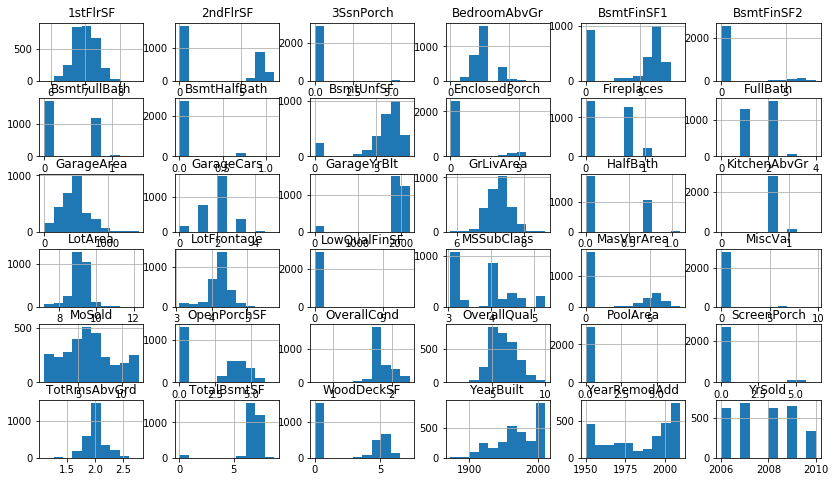

In [19]:
plt.rcParams['figure.figsize']= [14.0, 8.0]
numeric_df.hist()

In [20]:
plt.rcParams['figure.figsize']= [10.0, 4.0]

C:\Users\jtlqh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


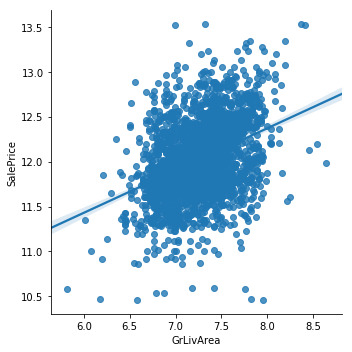

In [23]:
data=pd.concat([numeric_df.GrLivArea[train.index], SalePrice], axis=1)
sns.lmplot(x='GrLivArea', y= 'SalePrice', data=data)


In [24]:
print(numeric_df[numeric_df.GrLivArea>8.2].index.tolist())

outlier=[1298, 1089]

[523, 691, 1182, 1298, 728, 1089, 1362]


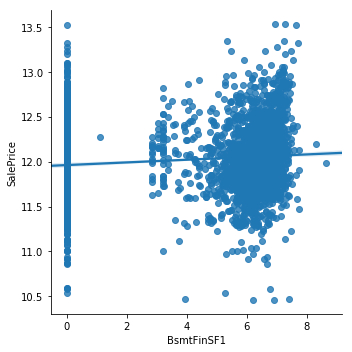

In [25]:
data=pd.concat([numeric_df.BsmtFinSF1[train.index], SalePrice], axis=1)
sns.lmplot(x='BsmtFinSF1', y= 'SalePrice', data=data)


In [26]:
numeric_df.BsmtFinSF1[numeric_df.BsmtFinSF1>370]

Series([], Name: BsmtFinSF1, dtype: float64)

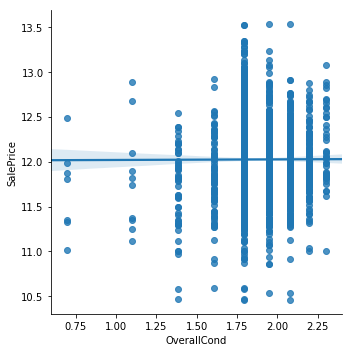

In [27]:
data=pd.concat([numeric_df.OverallCond[train.index], SalePrice], axis=1)
sns.lmplot(x='OverallCond', y= 'SalePrice', data=data)


plt.scatter(numeric_df['TotalSF'].iloc[train.index], train.SalePrice)

numeric_df[numeric_df.TotalSF>31.5].TotalSF

In [28]:
outlier

[1298, 1089]

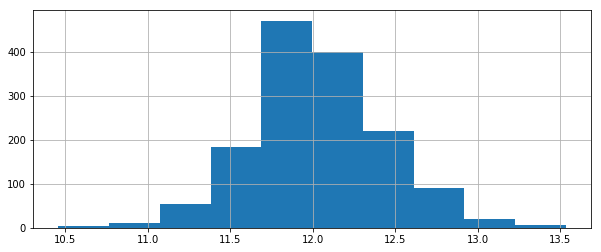

In [29]:
SalePrice.hist()


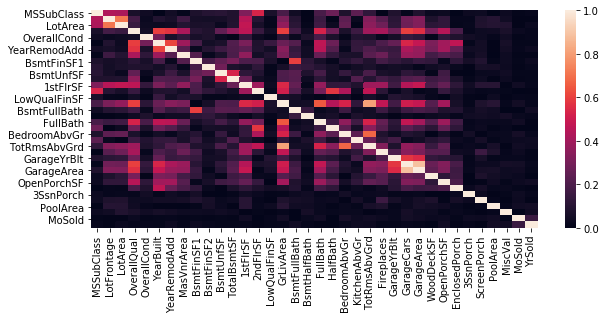

In [30]:
#numeric_df.drop(columns=col_to_drop,inplace=True)
num_cor = numeric_df.corr().apply(abs)
sns.heatmap(num_cor)


In [31]:
cat_dummy = pd.get_dummies(cat_df)

overfit_list=[]
for i in cat_dummy.columns:
    dominant = cat_dummy[i].value_counts().apply(lambda x: x/len(cat_dummy[i]))[0]
    if dominant>.997: overfit_list.append(i)
cat_dummy.drop(columns=overfit_list, inplace=True)

In [32]:
feature_dummy = pd.concat([numeric_df, cat_dummy], axis=1)
print(feature_dummy.shape)
feature_dummy.head()

(2919, 255)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,1.791759,2003,2003,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,2003.0,2.0,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,2.197225,1976,1976,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,1976.0,2.0,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,1.791759,2001,2002,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,2001.0,2.0,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,1.791759,1915,1970,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,1998.0,3.0,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,1.791759,2000,2000,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,2000.0,3.0,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0


feature_dummy = pd.concat([numeric_df, cat_df],axis=1) #.drop(columns=col_to_drop)
feature_dummy = pd.get_dummies(feature_dummy)
print(feature_dummy.shape)
feature_dummy.head()

### Regression Modeling

In [175]:
def get_error(X_train,y_train,X_test,y_test, model, show = True, refit = True):
    if refit: model.fit(X_train, y_train)
    train_error = 1 - r2_score(y_train, model.predict(X_train))
    test_error = 1 - r2_score(y_test,model.predict(X_test))
    if show:
        print("train error ", train_error)
        print("test error", test_error)
    return [train_error, test_error]



In [34]:
outlier

[1298, 1089]

In [176]:
train_index = train.drop(index=outlier).index
#train_index = train.index

X_train, X_test, y_train, y_test = ms.train_test_split(feature_dummy.iloc[train_index,], \
                                                       SalePrice[train_index], test_size=0.2, random_state=108)
#X_train, X_test, y_train, y_test = ms.train_test_split(feature_dummy.iloc[train_index,:], train.iloc[train_index,]['SalePrice'], test_size=0.2, random_state=108)
X_train.shape

(1166, 255)

#### Ridge Regression

In [107]:
ridge = Ridge(random_state=108)

#run a grid search to find error rates for max_depths ranging 1-30
#print(ridge.get_params())
grid_para = dict(alpha = np.linspace(1,20,10))
ridge.set_params(random_state=108, tol=0.0001)
# create and fit a ridge regression model, testing each alpha
grid_search_ridge = ms.GridSearchCV(ridge,  cv=5, param_grid=grid_para, n_jobs=-1, verbose=2)
%time grid_search_ridge.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
ridge=grid_search_ridge.best_estimator_
print(ridge)
get_error(X_train,y_train,X_test,y_test,ridge, True,False)      

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 108, 'solver': 'auto', 'tol': 0.001}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 252 ms
Ridge(alpha=5.222222222222222, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=108, solver='auto', tol=0.0001)
train error  0.06150334412773262
test error 0.07832810086558206


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


[0.06150334412773262, 0.07832810086558206]

#### Lasso Regression

In [37]:
lasso = Lasso(tol=0.001,max_iter=1000, random_state=108)

#run a grid search to find error rates for max_depths ranging 1-30
grid_para = dict(alpha = np.logspace(-5,3,20))
lasso.set_params(random_state=108)
# create and fit a ridge regression model, testing each alpha
grid_search_lasso = ms.GridSearchCV(lasso,  cv=5, param_grid=grid_para, n_jobs=-1)
%time grid_search_lasso.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
lasso=grid_search_lasso.best_estimator_
print(lasso)
get_error(X_train,y_train,X_test,y_test,lasso)  

Wall time: 1.69 s
Lasso(alpha=0.0004832930238571752, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=108, selection='cyclic', tol=0.001, warm_start=False)
train error  0.0676363971824141
test error 0.07645529869679857


[0.0676363971824141, 0.07645529869679857]

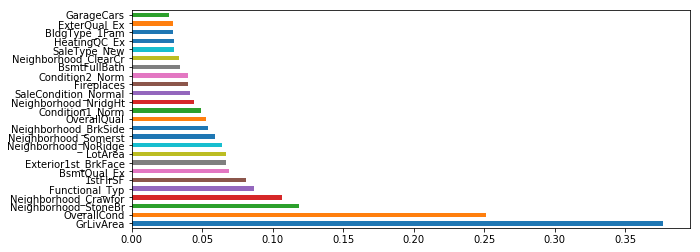

In [38]:
pd.Series(dict(zip(X_train.columns,lasso.coef_))).sort_values(ascending=False)[:25].plot('barh')


#### Elastic Net Regression

net   = ElasticNet(tol=0.04) # need to increase tolerance to reach convergence

#run a grid search to find error rates for max_depths ranging 1-30
grid_para = dict(alpha = np.logspace(-5,-3,10),
                l1_ratio =np.logspace(-3,1,5))
net.set_params(random_state=108)
grid_search_net = ms.GridSearchCV(net,  cv=5, param_grid=grid_para, n_jobs=-1, verbose=2)
%time grid_search_net.fit(X_train,y_train)  # What to call to trigger the gridSearchCV
net=grid_search_net.best_estimator_
print(net)
get_error(X_train,y_train,X_test,y_test,net)  

#### Random Forest

In [70]:

rf = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=15,
           max_features=17, max_leaf_nodes=None,
           min_impurity_decrease=1e-06, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0001, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=108, verbose=0, warm_start=False)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
rf.fit(X_train,y_train)
get_error(X_train,y_train,X_test,y_test,rf)


Parameters currently in use:

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 15,
 'max_features': 17,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 1e-06,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0001,
 'n_estimators': 222,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 108,
 'verbose': 0,
 'warm_start': False}
train error  0.001274918900646127
test error 0.11296850681451065


[0.001274918900646127, 0.11296850681451065]

Wall time: 4.09 s
RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=15,
           max_features=17, max_leaf_nodes=None,
           min_impurity_decrease=1e-06, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0001, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=108, verbose=0, warm_start=False)
train error  0.001274918900646127
test error 0.11296850681451065


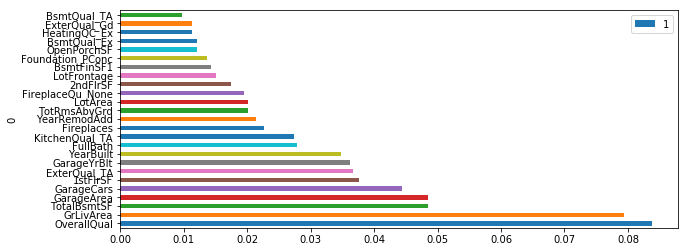

In [71]:
# use dummy dataframe for tree models

# Create the random grid
random_grid = {
               'max_features': range(15,20),
               'max_depth': range(15,20),
               'min_samples_split': [2,3],
               'min_samples_leaf': [1,2],
                'n_estimators': range(100,251,1),
              'min_weight_fraction_leaf':[0.0001],
              'min_impurity_decrease':[0.000001]
}
#pprint(random_grid)

grid_search_forest = ms.RandomizedSearchCV(rf, random_grid, cv = 5, verbose=0, n_jobs = -1, random_state=108)
#grid_search_forest = RandomizedSearchCV(rf, random_grid, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)   # %time     is ipython magic command to measure the execution timebest_net=grid_search_net.best_estimator_

rf = grid_search_forest.best_estimator_
print(rf)
get_error(X_train,y_train,X_test,y_test,rf)  
importance_forest=(pd.DataFrame(sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1], reverse=True)))

importance_forest[:25].plot(kind='barh', x=0, y=1)

#### Gradient Boosting Machine

In [72]:
# gradient boosting on label dataframe
gbmr = GradientBoostingRegressor()
interval=1000
n_estimators=41 * interval
gbmr.set_params(alpha=0.8, criterion='mse', init=None,
             learning_rate=0.021544346900318846, loss='ls', max_depth=4,
             max_features=4, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4500,
             n_iter_no_change=None, presort='auto', random_state=108,
             subsample=0.9, tol=0.1, validation_fraction=0.2, verbose=0,
             warm_start=False)
gbmr.fit(X_train,y_train)
get_error(X_train,y_train,X_test,y_test,gbmr)

train error  0.005161643805545402
test error 0.08920342385296698


[0.005161643805545402, 0.08920342385296698]

Wall time: 2min 45s
GradientBoostingRegressor(alpha=0.8, criterion='mse', init=None,
             learning_rate=0.021544346900318846, loss='ls', max_depth=3,
             max_features=3, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4500,
             n_iter_no_change=None, presort='auto', random_state=108,
             subsample=0.9, tol=0.1, validation_fraction=0.2, verbose=0,
             warm_start=False)
train error  0.016830606003487403
test error 0.0945642929863364
[0.016830606003487403, 0.0945642929863364]


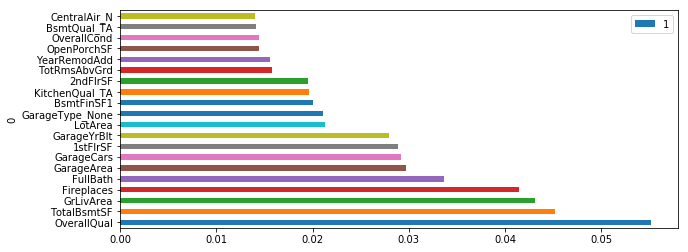

In [73]:
param_grid = {'n_estimators': range(3000,5000,500),
               'max_features': range(3,5),
               'max_depth': range(3,5),
               'min_samples_split': [2],
               'min_samples_leaf': [2],
               'learning_rate': np.logspace(-5,0,10),
                'subsample':[0.9]}
grid_search_gbmr =ms.GridSearchCV(gbmr, param_grid=param_grid, cv=5 ,return_train_score=True,n_jobs=-1)
#print(gbmr.get_params())
%time grid_search_gbmr.fit(X_train,y_train)

gbmr=grid_search_gbmr.best_estimator_
print(gbmr)
#print("best train error ", 1-r2_score(gbmr.predict(X_train), y_train))
#print("best test error ", 1-r2_score(gbmr.predict(X_test), y_test))
print(get_error(X_train, y_train, X_test, y_test, gbmr))

importance_gbmr=pd.DataFrame(sorted(zip(X_train.columns, gbmr.feature_importances_), key=lambda x: x[1], reverse=True))
importance_gbmr[:20].plot(kind='barh', x=0, y=1)

#### Support Vector Machine

In [177]:
svm = SVR(C= 20, epsilon= .008, gamma=.0003)
print(svm)
svm.fit(X_train, y_train)

get_error(X_train,y_train, X_test,y_test,svm, True,False)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.008, gamma=0.0003,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
train error  0.022091940189963077
test error 0.2264281507231103


[0.022091940189963077, 0.2264281507231103]

In [178]:
grid_para_svm = [
    {'C': range(150,300,1),#np.logspace(1,2,20),
     'gamma': [0.00001],#np.logspace(-3,3,10),
     'epsilon': [ 0.01],#np.logspace(-2,0,20),
     'degree': [3],
     'kernel': ['rbf']}
]
grid_search_svm = ms.GridSearchCV(svm, param_grid=grid_para_svm, cv=5, return_train_score=True,  n_jobs=-1)
%time grid_search_svm.fit(X_train, y_train)

svm =grid_search_svm.best_estimator_
print(svm)

print(get_error(X_train,y_train, X_test, y_test, svm))


Wall time: 1min 29s
SVR(C=298, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
train error  0.068759263005022
test error 0.09215547519413936
[0.068759263005022, 0.09215547519413936]


#### Xgboost Regression

In [161]:

n_estimators= 50000
warnings.filterwarnings('ignore')
xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=0.7, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=1.1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=-1, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
print(xgb.get_params())

%time xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=12,verbose=False)
get_error(X_train,y_train,X_test,y_test,xgb, True,False)


{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 0.7, 'colsample_bytree': 0.4, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1.1, 'missing': None, 'n_estimators': 2000, 'n_jobs': -1, 'nthread': -1, 'objective': 'reg:squarederror', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
Wall time: 3.03 s
train error  0.008941947354523472
test error 0.08570739334952615


[0.008941947354523472, 0.08570739334952615]

In [75]:
params = {'n_estimators': range(1000,10000,1000), 'max_depth':[5,6,7], 'min_child_weight':[1.1,1.2,1.3] }

#dtrain = xgboost.DMatrix(X_train, y_train)
#dtest = xgboost.DMatrix(X_test, y_test)
grid_search_xgb = ms.GridSearchCV(xgb, params, cv=5, return_train_score=True, n_jobs=-1)
%time grid_search_xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=11,verbose=False)

xgb=grid_search_xgb.best_estimator_
print(xgb)

get_error(X_train,y_train,X_test,y_test,xgb, True,False)

Wall time: 7min 51s
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=0.7, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=1.1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=-1, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
train error  0.008941947354523472
test error 0.08570739334952615


[0.008941947354523472, 0.08570739334952615]


### Asemble all models

In [179]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
#svm = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= .008, gamma=.0003))
svm = make_pipeline(RobustScaler(), SVR(C= 298, epsilon=0.01, gamma=1e-05))
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas = np.linspace(1,20,10)))
lasso = make_pipeline(RobustScaler(), LassoCV(alphas = np.logspace(-3,1,10)))


In [154]:
np.logspace(-5,-4,11)

array([1.00000000e-05, 1.25892541e-05, 1.58489319e-05, 1.99526231e-05,
       2.51188643e-05, 3.16227766e-05, 3.98107171e-05, 5.01187234e-05,
       6.30957344e-05, 7.94328235e-05, 1.00000000e-04])

In [156]:
models_name = ['ridge', 'lasso', 'forest', 'gradient boost', 'svm', 'xgboost']

In [181]:
#models = [ridge, lasso, net, rf, gbmr, svm, xgb]
models = [ridge, lasso, rf, gbmr, svm, xgb]

#### kfold cross verification

In [158]:
X=feature_dummy.iloc[train_index]
y=SalePrice[train_index]
ms_k3 = ms.KFold(n_splits=5)

In [180]:
ms.cross_val_score(estimator=svm, X=X, y=y, cv=ms_k3)

array([0.92562862, 0.89296211, 0.90942382, 0.92352047, 0.91374598])

In [182]:

kscores=[]
for i,model in enumerate(models):
    print(models_name[i])
    kscores.append(ms.cross_val_score(estimator=model, X=X, y=y, cv=ms_k3))

ridge
lasso
forest
gradient boost
svm
xgboost


In [183]:

score_df=pd.DataFrame(kscores,models_name[:6])
mean=score_df.apply(np.mean,axis=1)
std=score_df.apply(np.std,axis=1)
score_df=pd.concat([mean,std],axis=1)
score_df.columns=['mean','std']
score_df

,mean,std
ridge,0.910454,0.010106
lasso,0.912335,0.010104
forest,0.877101,0.010467
gradient boost,0.905703,0.011690
svm,0.913056,0.011705
xgboost,0.908111,0.011921


### Fit Models

In [ ]:
for model in models:
    model.fit(X,y)
rmse = [np.sqrt(np.mean((y-model.predict(X))**2)) for model in models]

In [76]:
# model rmse
pd.Series(dict(zip(models_name, rmse)))

ridge             0.095846
lasso             0.105313
forest            0.016294
gradient boost    0.053971
svm               0.103950
xgboost           0.054016
dtype: float64

### SalePrice Prediction

In [191]:
submissions = [x.predict(feature_dummy.tail(test.shape[0])) for x in models]

In [192]:
submissions = pd.DataFrame(submissions, index=models_name).T.apply(np.exp).apply(lambda x: np.round(x,1))
submissions.head()

,ridge,lasso,forest,gradient boost,svm,xgboost
0,119862.8,120360.7,125343.1,125863.0,120185.4,124771.1
1,154439.0,151030.5,148914.9,162333.4,158060.4,157515.8
2,185445.0,183042.4,183514.9,187635.9,191761.4,190385.6
3,199366.8,200587.6,190485.1,202965.7,204909.3,192494.5
4,201100.6,199782.8,188326.9,193054.8,191023.5,183967.4


### Blending Models

In [201]:
submissions['blend'] = submissions.apply(lambda x: x['ridge']*.35 + x['svm']*.25 + \
                                         (x['lasso']+x['forest']+x['gradient boost']+x['xgboost'])*.1 , axis=1)\
                        .apply(lambda x: np.round(x,1))
submissions['Id']=test['Id']
submissions.head()

,ridge,lasso,forest,gradient boost,svm,xgboost,blend,Id
0,119862.8,120360.7,125343.1,125863.0,120185.4,124771.1,121632.1,1461
1,154439.0,151030.5,148914.9,162333.4,158060.4,157515.8,155548.2,1462
2,185445.0,183042.4,183514.9,187635.9,191761.4,190385.6,187304.0,1463
3,199366.8,200587.6,190485.1,202965.7,204909.3,192494.5,199659.0,1464
4,201100.6,199782.8,188326.9,193054.8,191023.5,183967.4,194654.3,1465


In [197]:
for name in submissions.columns[:-1]:
    data=submissions[['Id', name]]
    data.columns=['Id','SalePrice']
    data.to_csv(name+"_py4.csv", index=False)


### Kaggle Score vs Models

In [200]:
kaggle_score=[.11884, .12067, .12604, .12746, .11952, .12652, .11809]
pd.Series(dict(zip(models_name+['blend'], kaggle_score)))

ridge             0.11884
lasso             0.12067
forest            0.12604
gradient boost    0.12746
svm               0.11952
xgboost           0.12652
blend             0.11809
dtype: float64